# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)       # from -90deg latitude to +90deg latitude (south pole to north pole)
lng_range = (-180, 180)     # freom -180deg logitude to +180deg longitude (Fiji to Fiji)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)     # a list of 1500 latitude from a uniform rectangular distribution
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)     # a list of 1500 longitudes from a uniform rectangular distribution
lat_lngs = zip(lats, lngs)                                          # Combine the two lists, pair wise in to a list of tuples (lat, long pair)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# This will be less than 1500 because multiple lat/longs will be close to the same island in the Pacific/Atlantic oceans.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - well, fetch the response and extract the JSON payload
        city_weather = requests.get(city_url).json()
        '''
        Example of API response
        {
            "coord": { "lon": 10.99, "lat": 44.34 },
            "weather": [
                { "id": 501, "main": "Rain", "description": "moderate rain", "icon": "10d" }
            ],
            "base": "stations",
            "main": { "temp": 298.48, "feels_like": 298.74, "temp_min": 297.56, "temp_max": 300.05,
                    "pressure": 1015, "humidity": 64, "sea_level": 1015, "grnd_level": 933 },
            "visibility": 10000,
            "wind": { "speed": 0.62, "deg": 349, "gust": 1.18 },
            "rain": { "1h": 3.16 },
            "clouds": { "all": 100 },
            "dt": 1661870592,
            "sys": { "type": 2, "id": 2075663, "country": "IT", "sunrise": 1661834187, "sunset": 1661882248 },
            "timezone": 7200,
            "id": 3163858,
            "name": "Zocca",
            "cod": 200
        }
        '''

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | northam
Processing Record 4 of Set 1 | baganga
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kapuskasing
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | tan-tan
Processing Record 15 of Set 1 | saratamata
City not found. Skipping...
'coord'
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | laojunmiao
Processing Record 21 of Set 1 | manokwari
Processing Recor

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.24,20.24,38,4.76,PN,1686576090
1,port-aux-francais,-49.3500,70.2167,5.99,5.99,100,12.81,TF,1686576090
2,northam,51.0333,-4.2167,19.25,17.36,90,3.44,GB,1686576090
3,baganga,7.5739,126.5600,26.68,26.68,14,2.31,PH,1686576091
4,blackmans bay,-43.0167,147.3167,9.18,7.63,99,3.10,AU,1686576091


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.24,20.24,38,4.76,PN,1686576090
1,port-aux-francais,-49.3500,70.2167,5.99,5.99,100,12.81,TF,1686576090
2,northam,51.0333,-4.2167,19.25,17.36,90,3.44,GB,1686576090
3,baganga,7.5739,126.5600,26.68,26.68,14,2.31,PH,1686576091
4,blackmans bay,-43.0167,147.3167,9.18,7.63,99,3.10,AU,1686576091


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

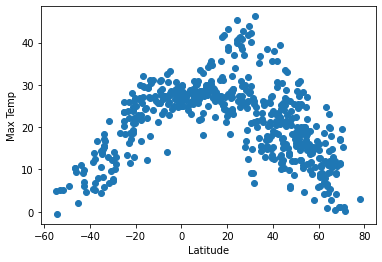

In [11]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Max Temp'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

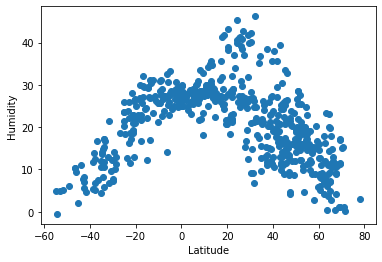

In [14]:
# Build the scatter plots for latitude vs. humidity
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Humidity'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

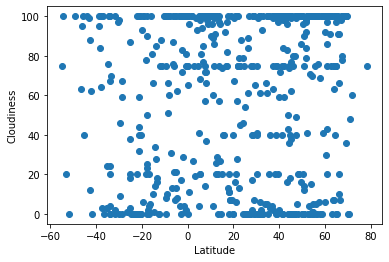

In [16]:
# Build the scatter plots for latitude vs. cloudiness
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Cloudiness'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

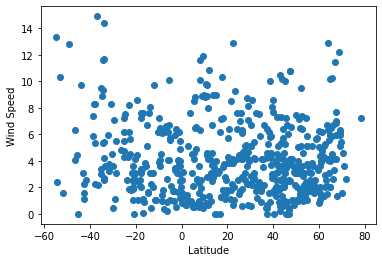

In [17]:
# Build the scatter plots for latitude vs. wind speed
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Wind Speed'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy import stats

def myfunc(x, y, titleX, titleY):
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    myline = []
    for i in range(len(x)):
        myline.append(slope * x[i] + intercept)
    plt.scatter(x, y)
    plt.plot(x, myline)
    plt.xlabel(titleX)
    plt.ylabel(titleY)
    plt.text(0.1, 0.1, f'y = {slope:.2f}x + {intercept:.2f}')
    plt.show()
    return slope


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (0, 90)       # from 0deg latitude to +90deg latitude (south pole to north pole)
lng_range = (-180, 180)     # freom -180deg logitude to +180deg longitude (Fiji to Fiji)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=750)     # a list of 1500 latitude from a uniform rectangular distribution
lngs = np.random.uniform(lng_range[0], lng_range[1], size=750)     # a list of 1500 longitudes from a uniform rectangular distribution
lat_lngs = zip(lats, lngs)                                          # Combine the two lists, pair wise in to a list of tuples (lat, long pair)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    if float(city.lat) < 0:    # Skip if nearest city is in southern hemisphere
        continue
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)

# Print the city count to confirm sufficient count
# This will be less than 1500 because multiple lat/longs will be close to the same island in the Pacific/Atlantic oceans.
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - well, fetch the response and extract the JSON payload
        city_weather = requests.get(city_url).json()
        '''
        Example of API response
        {
            "coord": { "lon": 10.99, "lat": 44.34 },
            "weather": [
                { "id": 501, "main": "Rain", "description": "moderate rain", "icon": "10d" }
            ],
            "base": "stations",
            "main": { "temp": 298.48, "feels_like": 298.74, "temp_min": 297.56, "temp_max": 300.05,
                    "pressure": 1015, "humidity": 64, "sea_level": 1015, "grnd_level": 933 },
            "visibility": 10000,
            "wind": { "speed": 0.62, "deg": 349, "gust": 1.18 },
            "rain": { "1h": 3.16 },
            "clouds": { "all": 100 },
            "dt": 1661870592,
            "sys": { "type": 2, "id": 2075663, "country": "IT", "sunrise": 1661834187, "sunset": 1661882248 },
            "timezone": 7200,
            "id": 3163858,
            "name": "Zocca",
            "cod": 200
        }
        '''

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        if float(city_lat) < 0:
            continue

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
northern_hemi_df = pd.DataFrame(city_data)

# Show Record Count
northern_hemi_df.count()

# Display sample data
northern_hemi_df.head()

Number of cities in the list: 380
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | midvagur
Processing Record 2 of Set 1 | galliano
Processing Record 3 of Set 1 | maysville
Processing Record 4 of Set 1 | zakamensk
Processing Record 5 of Set 1 | khodzha-maston
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | bontang
Processing Record 8 of Set 1 | severo-yeniseyskiy
Processing Record 9 of Set 1 | mukhorshibir'
City not found. Skipping...
'coord'
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | snowflake
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | krasnyy chikoy
Processing Record 18 of Set 1 | qingyuan
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | mukah
City not found. Skipping...


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midvagur,62.0511,-7.1939,12.46,12.46,0,5.14,FO,1686582586
1,galliano,29.4422,-90.2992,32.00,28.89,40,5.14,US,1686582719
2,maysville,38.6412,-83.7444,18.72,16.70,100,3.60,US,1686582805
3,zakamensk,50.3741,103.2863,16.44,16.44,99,0.73,RU,1686582410
4,khodzha-maston,38.7446,68.6270,21.27,21.27,73,0.71,TJ,1686582806


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 0)       # from -90deg latitude to 0deg latitude (south pole to north pole)
lng_range = (-180, 180)     # freom -180deg logitude to +180deg longitude (Fiji to Fiji)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=750)     # a list of 1500 latitude from a uniform rectangular distribution
lngs = np.random.uniform(lng_range[0], lng_range[1], size=750)     # a list of 1500 longitudes from a uniform rectangular distribution
lat_lngs = zip(lats, lngs)                                          # Combine the two lists, pair wise in to a list of tuples (lat, long pair)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    if float(city.lat) > 0:     # Skip if the nearest city is in the northern hemisphere
        continue
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)

# Print the city count to confirm sufficient count
# This will be less than 1500 because multiple lat/longs will be close to the same island in the Pacific/Atlantic oceans.
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - well, fetch the response and extract the JSON payload
        city_weather = requests.get(city_url).json()
        '''
        Example of API response
        {
            "coord": { "lon": 10.99, "lat": 44.34 },
            "weather": [
                { "id": 501, "main": "Rain", "description": "moderate rain", "icon": "10d" }
            ],
            "base": "stations",
            "main": { "temp": 298.48, "feels_like": 298.74, "temp_min": 297.56, "temp_max": 300.05,
                    "pressure": 1015, "humidity": 64, "sea_level": 1015, "grnd_level": 933 },
            "visibility": 10000,
            "wind": { "speed": 0.62, "deg": 349, "gust": 1.18 },
            "rain": { "1h": 3.16 },
            "clouds": { "all": 100 },
            "dt": 1661870592,
            "sys": { "type": 2, "id": 2075663, "country": "IT", "sunrise": 1661834187, "sunset": 1661882248 },
            "timezone": 7200,
            "id": 3163858,
            "name": "Zocca",
            "cod": 200
        }
        '''

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        if float(city_lat) > 0:
            continue

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
southern_hemi_df = pd.DataFrame(city_data)

# Show Record Count
southern_hemi_df.count()

# Display sample data
southern_hemi_df.head()

Number of cities in the list: 184
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | kone
Processing Record 7 of Set 1 | taro
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | hihifo
City not found. Skipping...
'coord'
Processing Record 17 of Set 1 | rio gallegos
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | taiohae
City not found. Skipp

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,12.67,12.67,86,9.67,ZA,1686582880
1,port-aux-francais,-49.3500,70.2167,5.97,5.97,100,12.35,TF,1686582874
2,puerto ayora,-0.7393,-90.3518,29.98,26.97,100,3.58,EC,1686583046
3,waitangi,-43.9535,-176.5597,9.90,9.90,100,9.35,NZ,1686583039
4,alice springs,-23.7000,133.8833,9.75,9.75,1,3.09,AU,1686583124


###  Temperature vs. Latitude Linear Regression Plot

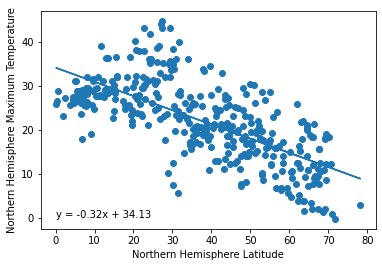

the r-value is: -0.3224370519023004


In [49]:
# Linear regression on Northern Hemisphere
y = list(northern_hemi_df['Max Temp'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Maximum Temperature'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

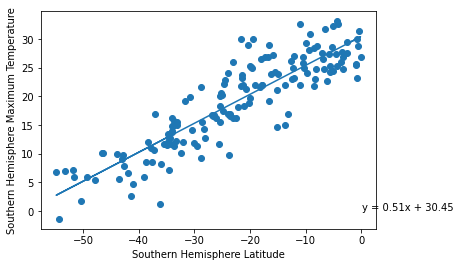

the r-value is: 0.5050206828671459


In [53]:
# Linear regression on Southern Hemisphere
y = list(southern_hemi_df['Max Temp'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Maximum Temperature'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** As you move further away from the equator maximum temperature decrease. The effect is worse in the southern hemisphere and there are fewer cities close to the south pole, compared to cities close to the north pole.

### Humidity vs. Latitude Linear Regression Plot

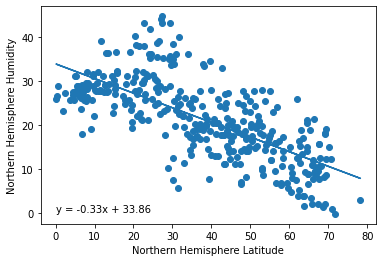

the r-value is: -0.3324736926239221


In [54]:
# Northern Hemisphere
y = list(northern_hemi_df['Humidity'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Humidity'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

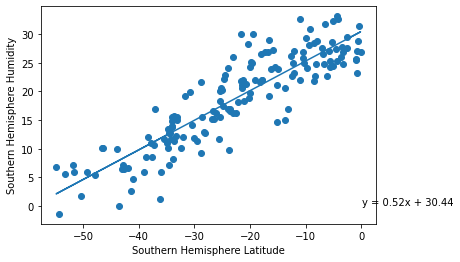

the r-value is: 0.5163772799323274


In [55]:
# Southern Hemisphere
y = list(southern_hemi_df['Humidity'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Humidity'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** The humidity relationship are very similar to the temperature relationship. There is a known relationship between temperature and humidty which would account for this similarity.

### Cloudiness vs. Latitude Linear Regression Plot

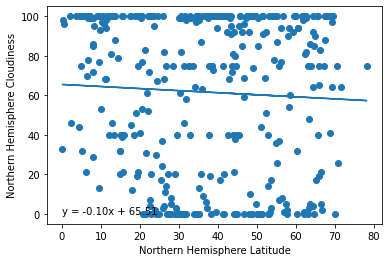

the r-value is: -0.1045040202454457


In [56]:
# Northern Hemisphere
y = list(northern_hemi_df['Cloudiness'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Cloudiness'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

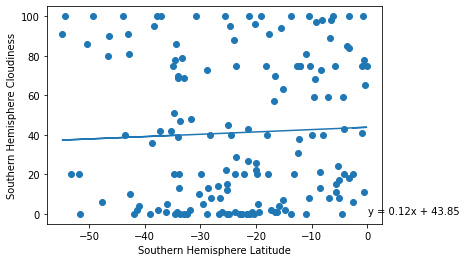

the r-value is: 0.11855221202742894


In [57]:
# Southern Hemisphere
y = list(southern_hemi_df['Cloudiness'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Cloudiness'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** There appears to be no relationship between latitude and cloudiness in either hemispher. The r values are both close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

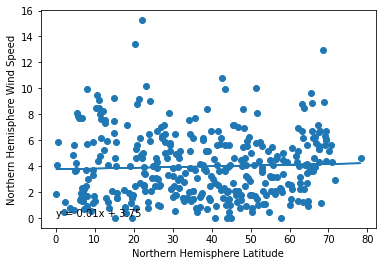

the r-value is: 0.005951333857135265


In [58]:
# Northern Hemisphere
y = list(northern_hemi_df['Wind Speed'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Wind Speed'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

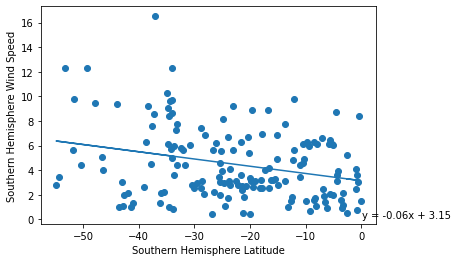

the r-value is: -0.05888624019010285


In [59]:
# Southern Hemisphere
y = list(southern_hemi_df['Wind Speed'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Wind Speed'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** Again, there appears to be little or no relationship between latitude and wind speed in either hemisphere. The r values are both very, very close to zero.